In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='12G')
print(h2o.__version__)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 28 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_ralf_nr2agh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.64 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


3.46.0.6


In [2]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 38 μs, sys: 2 μs, total: 40 μs
Wall time: 42 μs


In [3]:
%%time

import os
import pandas as pd
from pipelines import preprocessing_pipeline

train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_df = pd.read_csv(train_data_file, index_col=0, low_memory=False)
train_df = preprocessing_pipeline.fit_transform(train_df)
train_h2o = h2o.H2OFrame(train_df)
train_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 14.7 s, sys: 2.2 s, total: 16.9 s
Wall time: 18.2 s


day_phase,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
morning,17.3,17.3667,17.4333,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,13.4
morning,17.5,17.4333,17.3667,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.8
morning,17.3,16.9333,16.5667,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,14.2333,14.0667,13.9,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,15.5
morning,16.2,15.8333,15.4667,15.1,14.8667,14.6333,14.4,14.2333,14.0667,13.9,13.8667,13.8333,13.8,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,14.8
morning,15.1,14.8667,14.6333,14.4,14.2333,14.0667,13.9,13.8667,13.8333,13.8,13.6667,13.5333,13.4,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.7
morning,14.4,14.2333,14.0667,13.9,13.8667,13.8333,13.8,13.6667,13.5333,13.4,13.2,13,12.8,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,11.4
morning,13.9,13.8667,13.8333,13.8,13.6667,13.5333,13.4,13.2,13,12.8,13.7,14.6,15.5,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,11.9
morning,13.8,13.6667,13.5333,13.4,13.2,13,12.8,13.7,14.6,15.5,15.2667,15.0333,14.8,0.0417,0.0417,0.0417,0.0417,6.5417,0.0417,0.0417,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,15.1
morning,13.4,13.2,13,12.8,13.7,14.6,15.5,15.2667,15.0333,14.8,14.1,13.4,12.7,0.0417,6.5417,0.0417,0.0417,0.0417,0.0583,0.0583,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,17.1
morning,12.8,13.7,14.6,15.5,15.2667,15.0333,14.8,14.1,13.4,12.7,12.2667,11.8333,11.4,0.0417,0.0417,0.0583,0.0583,0.0583,0.0583,0.0583,90.6,90.6,90.6,90.6,90.6,90.6,99.6,0.96,0.96,0.96,0.96,0.96,0.96,4.8,17.9


In [4]:
%%time
test_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_df = pd.read_csv(test_data_file, index_col=0, low_memory=False)
test_df = preprocessing_pipeline.transform(test_df)
test_h2o = h2o.H2OFrame(test_df)
test_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 310 ms, sys: 49.7 ms, total: 360 ms
Wall time: 588 ms


day_phase,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
morning,13.5333,12.9667,12.4,11.7667,11.1333,10.5,10.225,9.95,9.675,9.4,9.46667,9.53333,9.6,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,55.8,54.4,53.2,55.6,55.1,54.9,54.7,4.8,4.8,4.8,4.8,4.8,4.9,6.06
noon,3.9,4.1,4.3,4.5,5.13333,5.76667,6.4,6.36667,6.33333,6.3,5.73333,5.16667,4.6,0.0583,0.0583,3.0583,0.0583,0.0583,0.0583,0.0583,91.1,93.5,91.6,95.6,114.8,102.6,118.7,13.92,16.22,16.69,23.12,30.51,24.57,32.43
afternoon,4.9,5.46667,6.03333,6.6,7.1,7.6,8.1,8.16667,8.23333,8.3,8.2,8.1,8,0.05,0.05,0.05,0.05,0.05,0.05,0.05,92.1,87.9,81.1,75.7,74.1,89,76.5,25.24,12.27,6.83,6.53,7.97,19.76,10.16
night,6.4,6.76667,7.13333,7.5,7.6,7.7,7.8,8.03333,8.26667,8.5,8.96667,9.43333,9.9,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,60.7,61.2,58.5,59.5,60.2,61.8,59.9,5,4.9,4.9,4.8,4.8,4.9,4.8
night,3.3,3.33333,3.36667,3.4,3.33333,3.26667,3.2,3.36667,3.53333,3.7,4.23333,4.76667,5.3,0,0,0,0,0,0,0,56.2,55.1,57.6,58.9,59.2,59.3,61,4.8,4.9,4.8,4.8,4.8,4.8,4.8
night,7.2,7.1,7,6.9,7.16667,7.43333,7.7,7.7,7.7,7.7,7.26667,6.83333,6.4,0.0167,0.0167,0.0167,0.0083,0.0083,0.0083,0.0083,66.9,80.6,80.7,91.9,84.1,81.3,67.6,10.6,6.93,9.72,6.74,12.8,7.79,8.47
noon,8.8,8.26667,7.73333,7.2,6.9,6.6,6.3,6.16667,6.03333,5.9,5.96667,6.03333,6.1,0.0583,0.0583,0.0583,7.0583,0.0583,0.0583,0.0583,88.9,88.5,83.9,75.6,71.9,73.7,73.4,11.8,7.5,11.51,4.8,4.9,5.2,6.24
night,6.8,6.9,7,7.1,7.3,7.5,7.7,7.86667,8.03333,8.2,8.36667,8.53333,8.7,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,55.9,56.4,57.1,58.4,61.1,59.9,60.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8
night,12.6,12.5333,12.4667,12.4,12.2,12,11.8,11.6667,11.5333,11.4,11.2667,11.1333,11,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,65.6,68,67.1,67.4,68.3,67.8,67.7,5.89,5,5,5.48,4.8,5.29,4.9
noon,7,6.46667,5.93333,5.4,5.4,5.4,5.4,5.83333,6.26667,6.7,6.6,6.5,6.4,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,84.7,86.7,85.5,90.8,95.8,83.5,90.1,12.96,9.13,13.91,16.89,10.07,10.28,13.34


In [5]:
%%time

y = 'bg+1:00'
x = [col for col in train_h2o.columns if col != y]
print(x)
print(y)

['day_phase', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-0:30', 'insulin-0:25', 'insulin-0:20', 'insulin-0:15', 'insulin-0:10', 'insulin-0:05', 'insulin-0:00', 'hr-0:30', 'hr-0:25', 'hr-0:20', 'hr-0:15', 'hr-0:10', 'hr-0:05', 'hr-0:00', 'cals-0:30', 'cals-0:25', 'cals-0:20', 'cals-0:15', 'cals-0:10', 'cals-0:05', 'cals-0:00']
bg+1:00
CPU times: user 81 μs, sys: 15 μs, total: 96 μs
Wall time: 88.9 μs


In [6]:
%%time

aml = H2OAutoML(max_models=500, seed=1000, max_runtime_secs=3600)
aml.train(x=x, y=y, training_frame=train_h2o)

AutoML progress: |
14:07:56.743: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 4.92 s, sys: 1.81 s, total: 6.73 s
Wall time: 1h 4min 57s


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20241110_140756_model_30


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    134                134                         3.08895e+06            0            14           11.3881       1             4141          1831.02

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.7286821380137147
RMSE: 0.8536288057544185
MAE: 0.6283292498625411
RMSLE: 0.09986123443716434
Mean Residual Deviance: 0.7286821380137147

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.873673553041188
RMSE: 1.6951913027859682
MAE: 1.2258833695540823
RMSLE: 0.1850032506817975
Mean Residual Deviance: 2.873673553041188

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0            nan           nan           nan           nan           nan
loglikelihood           nan       0            nan           nan           nan           nan           nan
mae                     1.22588   0.0032628    1.22738       1.23089       1.22459       1.22345       1.22311
mean_residual_deviance  2.87367   0.0121147    2.87101       2.89163       2.87938       2.86464       2.8617
mse                     2.87367   0.0121147    2.87101       2.89163       2.87938       2.86464       2.8617
r2                      0.67993   0.00201213   0.679988      0.677101      0.67892       0.681707      0.681932
residual_deviance       2.87367   0.0121147    2.87101       2.89163       2.87938       2.86464       2.8617
rmse                    1.69519   0.00357142   1.69441       1.70048       1.69687       1.69253       1.69166
rmsle                   0.185003  0.000240266  0.185141      0.185151      0.185233      0.18479       0.184701

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  -----------------  -----------------  ------------------  ------------------  -------------------
     2024-11-10 14:37:32  19 min  7.110 sec  0.0                2.9963898651501015  2.3420417452329207  8.978352223974245
     2024-11-10 14:37:33  19 min  7.925 sec  5.0                2.2621992003091043  1.769672734178037   5.117545221879151
     2024-11-10 14:37:34  19 min  8.665 sec  10.0               1.876060627930427   1.4560015187925368  3.519603479670708
     2024-11-10 14:37:35  19 min  9.363 sec  15.0               1.6578398851650702  1.271708456034397   2.748433084844133
     2024-11-10 14:37:35  19 min 10.043 sec  20.0               1.5223392291312627  1.1565410335233741  2.3175167285519676
     2024-11-10 14:37:36  19 min 10.662 sec  25.0               1.4205186086036827  1.0731456478234767  2.0178731173893425
     2024-11-10 14:37:37  19 min 11.292 sec  30.0               1.3417061882733408  1.0093284941851468  1.8001754956509772
     2024-11-10 14:37:37  19 min 11.897 sec  35.0               1.2797760750174783  0.9596324353771781  1.637826802187142
     2024-11-10 14:37:38  19 min 12.427 sec  40.0               1.2342710424810361  0.9232600041256378  1.5234250063072239
     2024-11-10 14:37:38  19 min 12.991 sec  45.0               1.1880921536527915  0.8871341024445328  1.4115629655713282
---  ---                  ---                ---                ---                 ---                 ---
     2024-11-10 14:37:43  19 min 17.602 sec  90.0               0.9337746962242718  0.690508505443969   0.8719351

In [7]:
%%time

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

CPU times: user 2.02 ms, sys: 1.66 ms, total: 3.68 ms
Wall time: 4.54 ms


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_3_20241110_140756_model_30,1.69519,2.87367,1.22588,0.185003,2.87367
GBM_grid_1_AutoML_3_20241110_140756_model_26,1.69623,2.8772,1.23091,0.185272,2.8772
GBM_grid_1_AutoML_3_20241110_140756_model_22,1.74385,3.04102,1.2526,0.189546,3.04102
GBM_grid_1_AutoML_3_20241110_140756_model_9,1.75226,3.07043,1.27959,0.191347,3.07043
GBM_grid_1_AutoML_3_20241110_140756_model_24,1.75293,3.07275,1.28206,0.191392,3.07275
GBM_grid_1_AutoML_3_20241110_140756_model_7,1.75997,3.0975,1.28296,0.191603,3.0975
GBM_grid_1_AutoML_3_20241110_140756_model_3,1.76729,3.12332,1.29298,0.192804,3.12332
GBM_grid_1_AutoML_3_20241110_140756_model_12,1.76838,3.12716,1.29254,0.192935,3.12716
GBM_4_AutoML_3_20241110_140756,1.77273,3.14258,1.30024,0.193352,3.14258
GBM_grid_1_AutoML_3_20241110_140756_model_28,1.77661,3.15635,1.29967,0.193612,3.15635


In [8]:
%%time
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_data = h2o.import_file(test_file)

y_pred = aml.predict(test_data=test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: user 24.6 ms, sys: 8.23 ms, total: 32.8 ms
Wall time: 609 ms


In [9]:
import pandas as pd

sample_submission = pd.read_csv(os.path.join('..', '..', '..', '..', 'data', 'raw', 'sample_submission.csv'), index_col=0)

sample_submission['bg+1:00'] = y_pred.as_data_frame().values
sample_submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 0.8536288228182106
R2: 0.9188401009676468


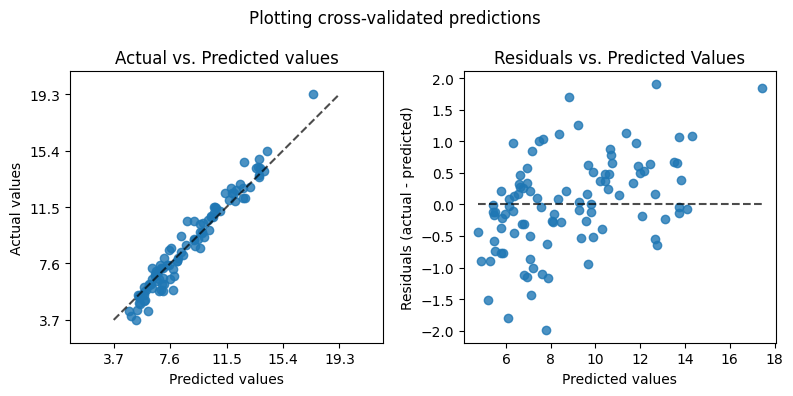

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_train = train_h2o[y].as_data_frame().values
y_pred = aml.leader.predict(train_h2o).as_data_frame().values

print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();